 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

Path('../Resources/# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Declaring file path
whale_path = Path("../Starter_Code/Resources/whale_returns.csv")

In [4]:
# Read csv and store as data frame
whale_df = pd.read_csv(whale_path)

In [5]:
# Reading whale returns
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df = whale_df.dropna()

# Verify nulls have been dropped
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()



Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna()

# Verify nulls have been dropped
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("../Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path)
sp_tsx_history_df["Close"]

0       $12,370.19
1       $12,391.23
2       $12,359.47
3       $12,447.68
4       $12,418.99
           ...    
1813    $17,118.44
1814    $17,128.71
1815    $17,180.15
1816    $17,168.21
1817    $17,098.56
Name: Close, Length: 1818, dtype: object

In [12]:
# Check Data Types
sp_tsx_history_df.dtypes

Date     object
Close    object
dtype: object

In [13]:
# Fix Data Types

# Close: object -> float
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")
# Date: object -> datetime
sp_tsx_history_df["Date"] = pd.to_datetime(sp_tsx_history_df["Date"])
sp_tsx_history_df.set_index("Date", inplace=True, drop=True)
sp_tsx_history_df.dtypes

C:\Users\gunin\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history_df.pct_change(1)
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
sp_tsx_daily_returns.dropna()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.rename(columns={'Close':'S&P Daily Return Percentage'}, inplace=True)


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

# Converting Date to Datetime object for Whale and Algorithmic and setting them as the index
whale_df["Date"] = pd.to_datetime(whale_df["Date"])
whale_df.set_index("Date", inplace=True, drop=True)

algo_df["Date"] = pd.to_datetime(algo_df["Date"])
algo_df.set_index("Date", inplace=True, drop=True)

# Concatenate the three dataframes
df_lst = [whale_df, algo_df, sp_tsx_daily_returns]
combined_df = pd.concat(df_lst, axis = "columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Return Percentage
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

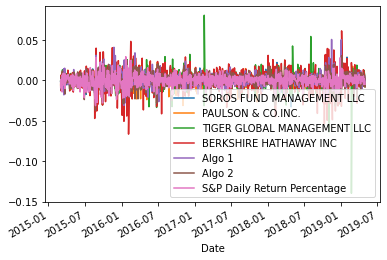

In [18]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

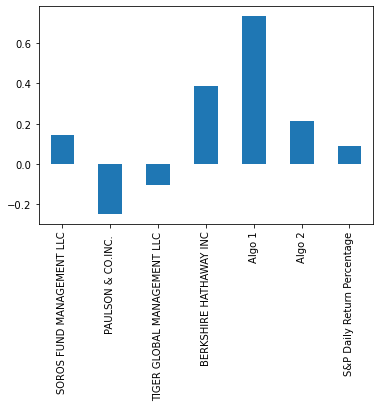

In [19]:
# Calculate cumulative returns of all portfolios
combined_df.sum()
# Plot cumulative returns
combined_df.sum().plot.bar()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

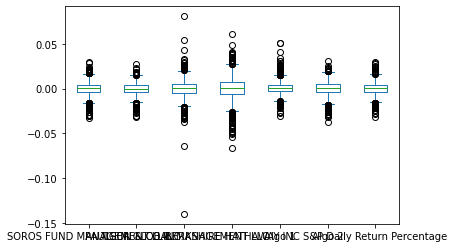

In [20]:
# Box plot to visually show risk
combined_df.plot.box()

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P Daily Return Percentage    0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = combined_df["S&P Daily Return Percentage"].std()
# Determine which portfolios are riskier than the S&P TSX 60
for column in combined_df:
    if combined_df[column].std() > sp_std:
        print(column)

SOROS FUND MANAGEMENT LLC
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = combined_df.std() * np.sqrt(252)
print(annualised_std)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P Daily Return Percentage    0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

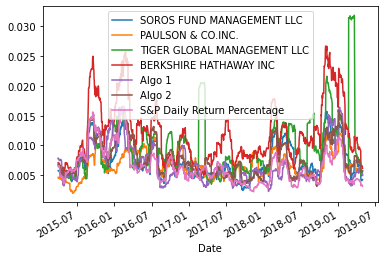

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

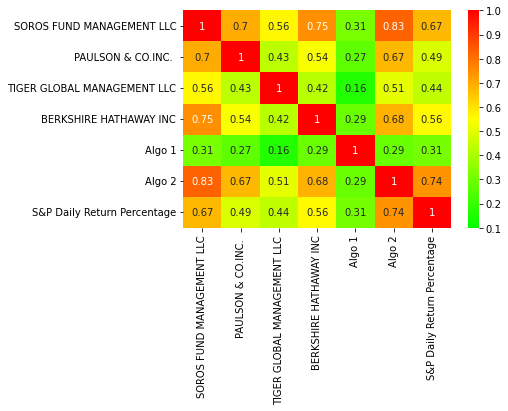

In [25]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
# Import seaborn and matplotlib.colors to make custom heatmap
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Set minimum, medium and maximum colour indicators fo colour map. Using hexcode for colours
clist = [('#00FF00'), ("#FFFF00"), ("#FF0000")]
green_red_gradient = LinearSegmentedColormap.from_list("custom_blue_orange", clist)
sns.heatmap(correlation, vmin=0.1, vmax=1, annot=True, cmap=green_red_gradient)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

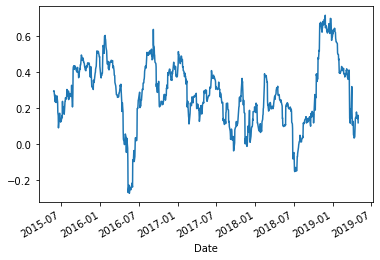

In [26]:
# Calculate covariance of a single portfolio

# Chosen Portfolio: Algo 1
algo1_cov = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P Daily Return Percentage"])

# Calculate variance of S&P TSX
sp_var = combined_df["S&P Daily Return Percentage"].rolling(window=60).var()

# Computing beta
algo1_beta = algo1_cov/sp_var

# Plot beta trend
algo1_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [27]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252)/(combined_df.std() * np.sqrt(252))
sharpe_ratios    

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P Daily Return Percentage    0.195550
dtype: float64

<AxesSubplot:>

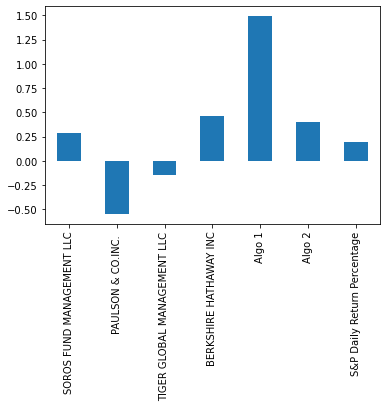

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Both Algorithmic portfolios outperform the S&P TSX 60. This is evidenced by their high sharpe ratios indicating a high return on less volaitility on returns. Algo1 had the highest Sharpe Ratio out of all other portfolios indicating that it performed that the portfolio generates high returns on low risk. The only Whale portfolio to outperform an algorithmic portfolio was the Berkshire Hathaway portfolio. Algo 1 still outperformed this. In addition to this, Algo 1 also had much lower beta than the S&P tsx, never going above one, showing that at no point in the given time period was Algo 1 ever more volatile that the market itself. In terms of risk aversion, Algo 1 still beats the other portfolios as it has lottle to no correlation with the growth of any other portfolio analysed.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [178]:
# Reading data from 1st stock
l_path = Path("../Starter_Code/Resources/l_historical.csv")
l_df = pd.read_csv(l_path)
l_df = l_df.rename({'Close':'L'}, axis = 'columns')
l_df.head()

,Symbol,Date,L
0,L,1/2/2018,57.99
1,L,1/3/2018,57.41
2,L,1/4/2018,57.42
3,L,1/5/2018,57.42
4,L,1/8/2018,56.86


In [179]:
# Reading data from 2nd stock
otex_path = Path("../Starter_Code/Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_path)
otex_df = otex_df.rename({'Close':'OTEX'}, axis = 'columns')
otex_df.head()

,Symbol,Date,OTEX
0,OTEX,1/2/2018,43.58
1,OTEX,1/3/2018,43.07
2,OTEX,1/4/2018,42.91
3,OTEX,1/5/2018,42.57
4,OTEX,1/8/2018,42.16


In [180]:
# Reading data from 3rd stock
shop_path = Path("../Starter_Code/Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path)
shop_df = shop_df.rename({'Close':'SHOP'}, axis = 'columns')
shop_df.head()

,Symbol,Date,SHOP
0,SHOP,1/2/2018,132.06
1,SHOP,1/3/2018,135.15
2,SHOP,1/4/2018,137.46
3,SHOP,1/5/2018,137.26
4,SHOP,1/8/2018,139.51


In [181]:
# Combine all stocks in a single DataFrame
l_df["Date"] = pd.to_datetime(l_df["Date"])
otex_df["Date"] = pd.to_datetime(otex_df["Date"])
shop_df["Date"] = pd.to_datetime(shop_df["Date"])

l_df = l_df.set_index("Date")
otex_df = otex_df.set_index("Date")
shop_df = shop_df.set_index("Date")

p_lst = [l_df, otex_df, shop_df]
gunin_df = pd.concat(p_lst, axis="columns", join="inner")
gunin_df = gunin_df.drop(['Symbol'], axis='columns')

gunin_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [129]:
# Reset Date index



In [182]:
# Reorganize portfolio data by having a column per symbol


In [188]:
# Calculate daily returns
gdf_returns = gunin_df.pct_change(1)
# Drop NAs
gdf_returns = gdf_returns.dropna()
# Display sample data
gdf_returns.head(-5)

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-13,-0.013814,0.003173,0.038439
2019-12-16,0.002455,0.012476,0.017682
2019-12-17,-0.001729,-0.001388,-0.012698


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [212]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# Assuming equal weights I just have to sum the returns df
# Display sample data
portfolio_pct_change = sum(gdf_returns.sum()*weights)
print(portfolio_pct_change)
gdf_returns.sum()

0.6983426583779061


L       0.172347
OTEX    0.317368
SHOP    1.605313
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [192]:
# Join your returns DataFrame to the original returns DataFrame
final_combined_df = pd.concat([combined_df, gdf_returns], axis = "columns", join="inner")
final_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Return Percentage,L,OTEX,SHOP
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010002,-0.011703,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000174,-0.003715,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000000,-0.007924,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009753,-0.009631,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.008969,-0.000712,-0.011254


In [196]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_combined_df.dropna()
final_combined_df.shape

(328, 10)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [198]:
# Calculate the annualized `std`
final_std = final_combined_df.std() * np.sqrt(252)
print(final_std)

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P Daily Return Percentage    0.099121
L                              0.162907
OTEX                           0.225703
SHOP                           0.504079
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

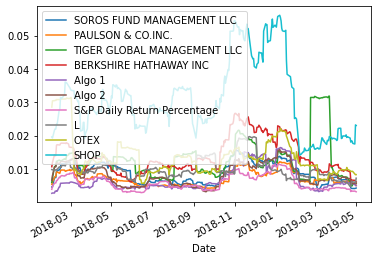

In [199]:
# Calculate rolling standard deviation
rolling_std = final_combined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

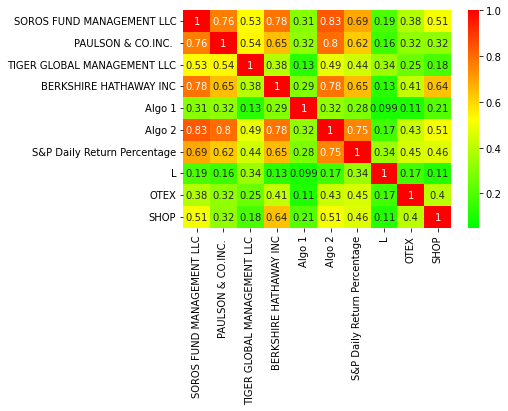

In [211]:
# Calculate and plot the correlation
clist = [('#00FF00'), ("#FFFF00"), ("#FF0000")]
green_red_gradient = LinearSegmentedColormap.from_list("custom_blue_orange", clist)
sns.heatmap(final_combined_df.corr(), vmin=0.05, vmax=1, annot=True, cmap=green_red_gradient)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

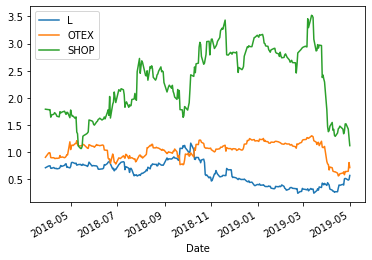

In [226]:
# Calculate and plot Beta
l_cov = final_combined_df["L"].rolling(window=60).cov(final_combined_df["S&P Daily Return Percentage"])
otex_cov = final_combined_df["OTEX"].rolling(window=60).cov(final_combined_df["S&P Daily Return Percentage"])
shop_cov = final_combined_df["SHOP"].rolling(window=60).cov(final_combined_df["S&P Daily Return Percentage"])

# S&P Variance already calculated

# Computing betas
l_beta = l_cov/sp_var
otex_beta = otex_cov/sp_var
shop_beta = shop_cov/sp_var

# Plot beta trend
ax = l_beta.plot(legend=True)
otex_beta.plot(ax=ax, legend=True)
shop_beta.plot(ax=ax, legend=True)
ax.legend(["L","OTEX","SHOP"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [228]:
# Calculate Annualized Sharpe Ratios
final_sharpe_ratios = (final_combined_df.mean() * 252)/(final_combined_df.std() * np.sqrt(252))
final_sharpe_ratios 

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P Daily Return Percentage    0.034651
L                              0.532599
OTEX                           0.762776
SHOP                           1.575294
dtype: float64

<AxesSubplot:>

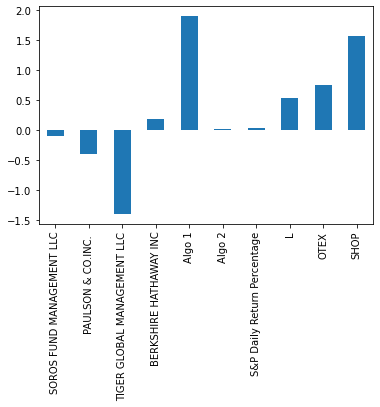

In [229]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

Relative to the whale and algorithmic portfolios as well as the S&P tsx my portfolio of my chosen 3 stocks performs quite well for the time period ranging from January 2018 to December 2019. This performance is mainly attributed to the high sharpe ratios of the three chosen stocks. All three of the chosen stocks that make up the portfolio boast sharpe ratios of over 0.5 with the highest (Shopify) having a sharpe ratio of 1.58. This implies a high return for the three stocks although not necessarily low risk as seen in the beta values calculated. Despite having the highest shrpe ratio value for the given period, Shopify also had Beta Values far exceeding market volatility. This indicates that it's high sharpe ratio is a result of high returns in relation to the market as opposed to low volatility. Loews (L) and Open Text (OTEX) were more risk averse as seen by their beta values hardly breaking past 1. Although not entirely ideal for portfolio diversification the 3 chosen stocks do show relatively low correlation with the S&P TSX. The best stock out of the three to be used to diversify a portfolio would be Loews as it has the lowest correlation with the S&P TSX (0.34) among the 3 chosen stocks.